In [1]:
# Import our libraries
import pandas as pd
import numpy as np

In [2]:
# Import sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve, auc, make_scorer, confusion_matrix, f1_score, fbeta_score

In [6]:
# Import the Naive Bayes, logistic regression, Bagging, RandomForest, AdaBoost, GradientBoost, Decision Trees and SVM Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#from matplotlib import style
#plt.style.use('bmh')
#plt.style.use('ggplot')
plt.style.use('seaborn-notebook')
from matplotlib.ticker import StrMethodFormatter

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer

In [9]:
train_df = pd.read_csv("Datasets/train.csv")
test_df = pd.read_csv("Datasets/test.csv")

## Data preprocessing

In [10]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [11]:
embarked_mode = train_df['Embarked'].mode()
data = [train_df, test_df]

In [13]:
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(embarked_mode)

### feature engineering

In [16]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'travelled_alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'travelled_alone'] = 'Yes'

C:\Users\sabbi\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


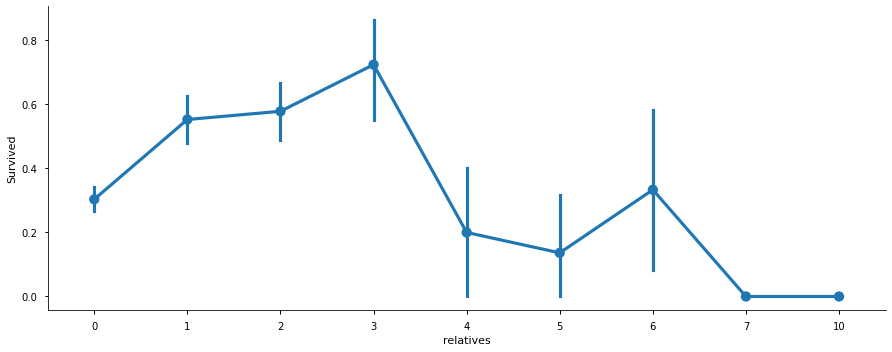

In [20]:
axes = sns.factorplot('relatives','Survived',data=train_df, aspect = 2.5, );

In [21]:
train_numerical_features = list(train_df.select_dtypes(include=['int64', 'float64', 'int32']).columns)
ss_scaler = StandardScaler()
train_df_ss = pd.DataFrame(data = train_df)
train_df_ss[train_numerical_features] =ss_scaler.fit_transform(train_df_ss[train_numerical_features])

#### One-Hot encoding:

In [22]:
encode_col_list = list(train_df.select_dtypes(include=['object']).columns)
for i in encode_col_list:
    train_df_ss =pd.concat([train_df_ss,pd.get_dummies(train_df_ss[i],prefix=i)],axis=1)
    train_df_ss.drop(i, axis = 1, inplace=True)

# Logistic Regression:

In [26]:
# Instantiate our model
logreg = LogisticRegression()
# Fit our model to the training data
logreg.fit(X_train, Y_train)
# Predict on the test data
logreg_predictions = logreg.predict(X_test)
logreg_data = pd.read_csv('test.csv')
logreg_data.insert((logreg_data.shape[1]),'Survived',logreg_predictions)
logreg_data.to_csv('LogisticRegression_result.csv')

NameError: name 'X_train' is not defined